# Matriz



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from google.colab import output

def gerar_matriz():
    matriz = [[1, 1, 1, 1, 1, 1],
              [1, random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), 1],
              [1, random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), 1],
              [1, random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), 1],
              [1, random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), random.choice([0, 2]), 1],
              [1, 1, 1, 1, 1,  1]]
    return matriz

def posicao_agente():
    # posAPAx = random.randint(1, 4)
    # posAPAy = random.randint(1, 4)
    posAPAy = 1
    posAPAx = 1
    return posAPAx, posAPAy

    # Exibe o ambiente com com as coordenadas do agente
def exibir(matriz, posAPAx, posAPAy):
    output.clear()
    plt.imshow(matriz, 'gray')  # Mostra a matriz do ambiente em tons de cinza
    plt.nipy_spectral()  # Altera o esquema de cores

    # Coloca o agente no ambiente
    plt.plot(posAPAy, posAPAx, marker='o', color='r', ls='')  # Marca a posição do agente

    plt.show(block=False)  # Exibe o ambiente sem bloquear a execução do código

    # Pausa a execução do código por 0.5 segundos para facilitar a visualização
    plt.pause(0.5)
    plt.clf()  # Limpa a figura

# Agente - Ações


In [ ]:
def estadoAtual(matriz, posicaoX, posicaoY):
    return matriz[posicaoX][posicaoY]

def executarAcao(matriz, percepcao, acao):
    posicaoX = percepcao[0]
    posicaoY = percepcao[1]

    if acao == 'acima':
        posicaoX = posicaoX - 1
    elif acao == 'abaixo':
        posicaoX = posicaoX + 1
    elif acao == 'esquerda':
        posicaoY = posicaoY - 1
    elif acao == 'direita':
        posicaoY = posicaoY + 1
    elif acao == 'aspirar':
        matriz[posicaoX][posicaoY] = 0

    estado = estadoAtual(matriz, posicaoX, posicaoY)

    percepcao = [posicaoX, posicaoY, estado]
    return percepcao

# Agente Reativo Simples

In [ ]:
def funcaoMapear():
    mapa = [['direita', 'abaixo',   'abaixo',   'abaixo',   'abaixo',   'esquerda'],
            ['direita', 'direita',  'direita',  'direita',  'abaixo',   'esquerda'],
            ['direita', 'acima',    'abaixo',   'esquerda', 'esquerda', 'esquerda'],
            ['direita', 'acima',    'direita',  'direita',  'abaixo',   'esquerda'],
            ['direita', 'acima',    'esquerda', 'esquerda', 'esquerda', 'esquerda'],
            ['direita', 'acima',    'acima',    'acima',    'acima',    'esquerda']]
    return mapa

def agenteReativoSimples(matriz, percepcao): # retorna a acao que o robo deve tomar
    posicaoX = percepcao[0]
    posicaoY = percepcao[1]
    estado = estadoAtual(matriz, posicaoX, posicaoY)
    if(estado == 2):
        return 'aspirar'
    else:
        mapa = funcaoMapear()
        return mapa[posicaoX][posicaoY]

# Principal - Agente Reativo Simples



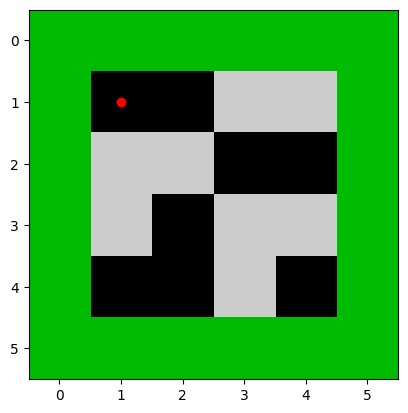

<Figure size 640x480 with 0 Axes>

In [ ]:
# Função principal
matriz = gerar_matriz()

posAPAx, posAPAy = posicao_agente()
estado = estadoAtual(matriz, posAPAx, posAPAy)
percepcao = [posAPAx, posAPAy, estado]

exibir(matriz, posAPAx, posAPAy)

while False:
  percepcao = executarAcao(matriz, percepcao, agenteReativoSimples(matriz, percepcao))
  exibir(matriz, percepcao[0], percepcao[1])

In [ ]:
# Responda: A) A sua solução é extensível para um mundo 3 x 3? E para um mundo 6 x 6?

# Só é possível a partir da refatoração do código das ações da matriz para a dimensão desejada, assim o robô terá seu percurso definido.

# Agente Orientado a Objetivo

In [ ]:
def agenteObjetivo(matriz, percepcao):
    posicaoX = percepcao[0]
    posicaoY = percepcao[1]
    estado = estadoAtual(matriz, posicaoX, posicaoY)

    if(estado == 2):
        return 'aspirar'

    ambiente = np.array(matriz)
    sujeirasX, sujeirasY = np.where(ambiente == 2)

    posicaoSujeiraMaisProximaX = sujeirasX[0]
    posicaoSujeiraMaisProximaY = sujeirasY[0]

    diferenca = abs(posicaoX - posicaoSujeiraMaisProximaX) + abs(posicaoY - posicaoSujeiraMaisProximaY)

    for i in range(len(sujeirasY)):
      if diferenca > abs(posicaoY - sujeirasY[i]) + abs(posicaoX - sujeirasX[i]):
        diferenca = abs(posicaoY - sujeirasY[i]) + abs(posicaoX - sujeirasX[i])

        posicaoSujeiraMaisProximaX = sujeirasX[i]
        posicaoSujeiraMaisProximaY = sujeirasY[i]

    if posicaoX - posicaoSujeiraMaisProximaX > 0:
      return 'acima'
    elif posicaoX - posicaoSujeiraMaisProximaX < 0:
      return 'abaixo'
    elif posicaoY - posicaoSujeiraMaisProximaY > 0:
      return 'esquerda'
    elif posicaoY - posicaoSujeiraMaisProximaY < 0:
      return 'direita'
    else:
      return 'NoOp'

def checkObj(matriz):
    ambiente = np.array(matriz)
    return 1 if 2 in ambiente else 0

# Principal - Agente Baseado em Objetivo

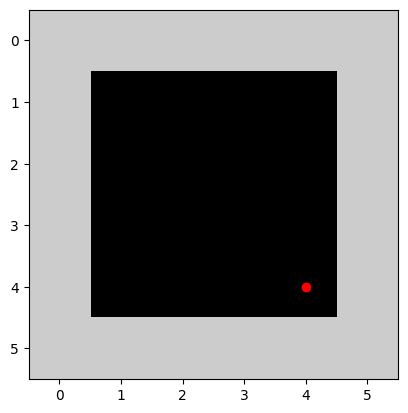

Pontos: 16


<Figure size 640x480 with 0 Axes>

In [ ]:
# Função principal
matriz = gerar_matriz()

posAPAx, posAPAy = posicao_agente()
estado = estadoAtual(matriz, posAPAx, posAPAy)
percepcao = [posAPAx, posAPAy, estado]

exibir(matriz, posAPAx, posAPAy)

pontos = 0

while checkObj(matriz):
  percepcao = executarAcao(matriz, percepcao, agenteObjetivo(matriz, percepcao))
  exibir(matriz, percepcao[0], percepcao[1])

  pontos += 1

print('Pontos:', pontos)

In [ ]:
# Responda: B) É possível ter todo o espaço limpo efetivamente? Justifique sua resposta.

# Sim, o robô faz o mapeamento da matriz com um for procurando onde tem 2, ou seja, local está sujo. Pode haver melhorias pois no momento ele apenas calcula a distância da próxima sujeira e não de todo o ambiente.